# Import Libraries

In [88]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [89]:
df=pd.read_csv("/kaggle/input/mall-customer/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Preview of Mall Customers Data Set

In [90]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Summary of the Diabetes Dataset Structure and Data Types

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Statistical Summary of the Diabetes Dataset

In [92]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Cleaning

### Missing Values Check in Mall Customers Data Set

In [93]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Title: Number of Unique Values in Each Column of Mall Customers Data Set

In [94]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

### Transforming Gender Column to Numerical Values

In [15]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


### Male = 1
### Female = 0

### "Gender Distribution in Mall Customers Data Set

Gender
0    112
1     88
Name: count, dtype: int64


<Axes: ylabel='count'>

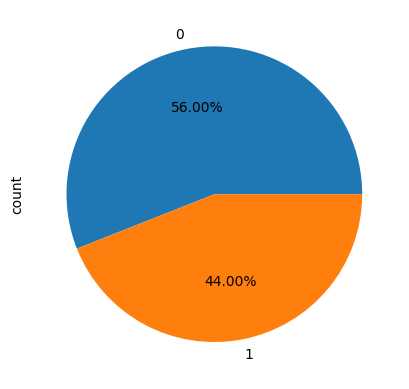

In [18]:
print(df["Gender"].value_counts())
df["Gender"].value_counts().plot.pie(autopct="%0.2f%%")

### Average Annual Income and Spending Score by Gender

In [24]:
df.groupby(df["Gender"]).agg({'Annual Income (k$)':"mean","Spending Score (1-100)":"mean"})

,Annual Income (k$),Spending Score (1-100)
Gender,,
0,59.250000,51.526786
1,62.227273,48.511364


### Maximum Spending Score and Last Gender Value in Dataset

In [33]:
df[["Spending Score (1-100)","Gender"]].max()

Spending Score (1-100)    99
Gender                     1
dtype: int64

### Maximum Annual Income and Last Gender Value in Dataset

In [35]:
df[["Annual Income (k$)","Gender"]].max()

Annual Income (k$)    137
Gender                  1
dtype: int64

### Pairwise Relationships Colored by Gender

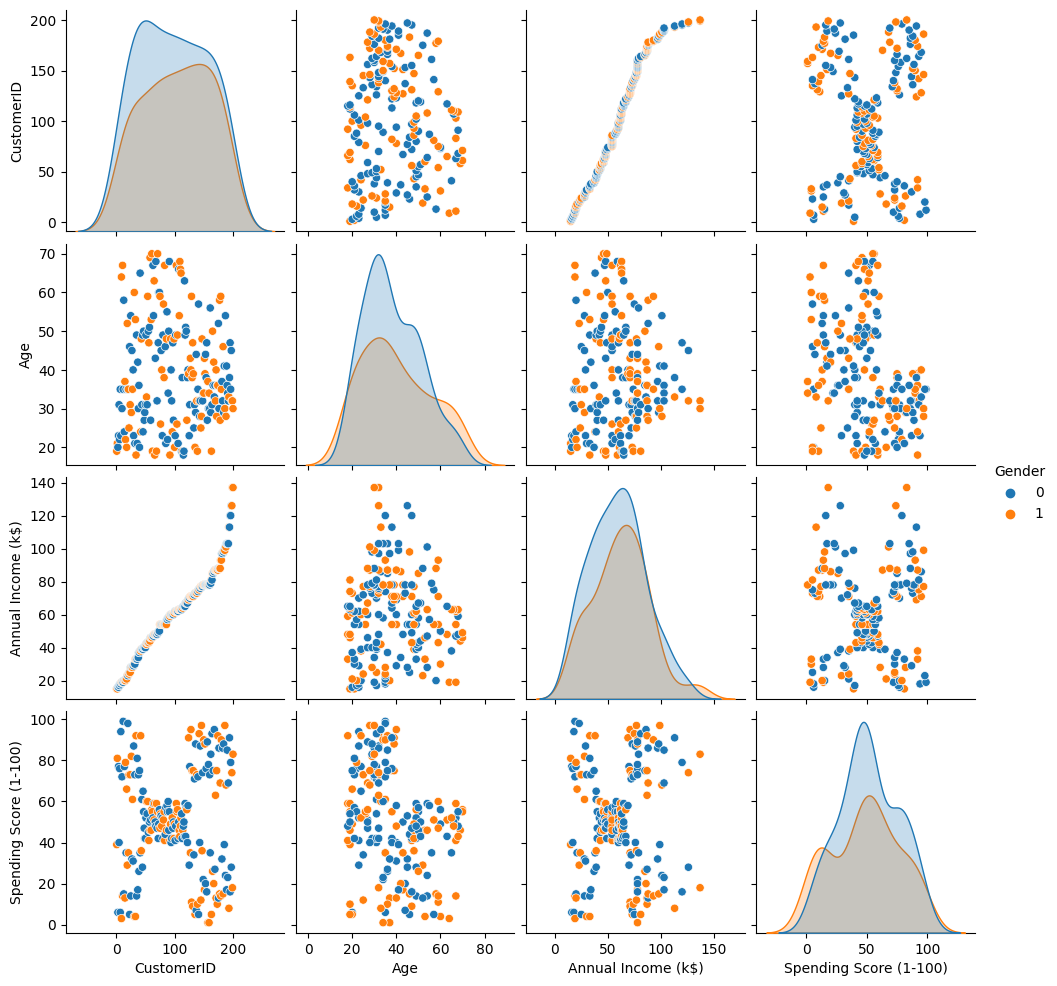

In [41]:
sns.pairplot(df,hue="Gender")

### Distribution of Features in Dataset

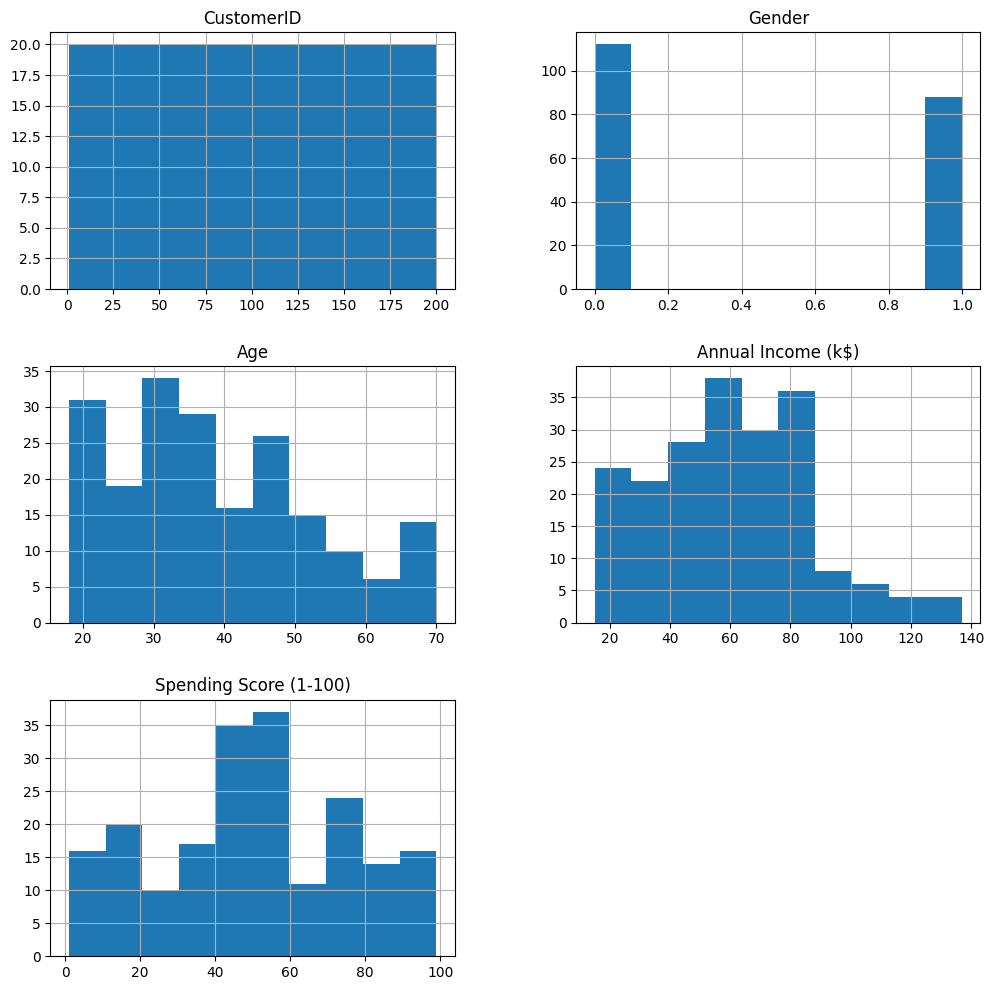

In [43]:
df.hist(figsize=(12,12))
plt.show()

# Buliding Model 

In [49]:
clusters=[]
j=[]

### Elbow Method for Optimal Number of Clusters

In [50]:
for i in range (1,12):
    model=KMeans(n_clusters=i)
    model.fit(df)
    clusters.append(i)
    j.append(model.inertia_)
    

### Clusters vs. Inertia Values for KMeans

In [51]:
pd.DataFrame(clusters,j)

,0
975512.060000,1
387065.713771,2
271594.461295,3
195393.503846,4
157183.296374,5
122601.937467,6
103175.928997,7
86146.217624,8
77010.159058,9
69021.970086,10


### Elbow Method: Inertia vs. Number of Clusters

Text(0, 0.5, 'Percentage Of Error')

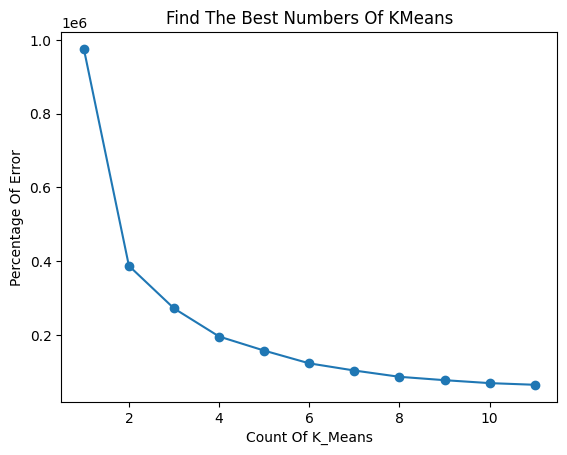

In [57]:
plt.plot(clusters,j,marker="o")
plt.title("Find The Best Numbers Of KMeans")
plt.xlabel("Count Of K_Means")
plt.ylabel("Percentage Of Error")

### KMeans Clustering with 4 Clusters: Predictions for Each Data Point

In [61]:
model= KMeans(n_clusters=4)
model.fit(df)
pre=model.predict(df)


### DataFrame with KMeans Cluster Assignments

In [63]:
df["K_Means"]=pre
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_Means
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,0
197,198,1,32,126,74,2
198,199,1,32,137,18,0


### Distribution of Data Points Across KMeans Clusters

K_Means
3    66
1    59
2    39
0    36
Name: count, dtype: int64


<Axes: xlabel='K_Means'>

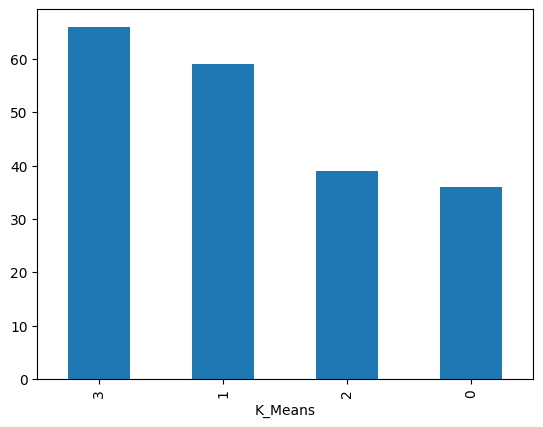

In [66]:
print(df['K_Means'].value_counts())
df['K_Means'].value_counts().plot(kind="bar")

### Subset DataFrames for Each KMeans Cluster

In [67]:
df1=df[df["K_Means"]==0]
df2=df[df["K_Means"]==1]
df3=df[df["K_Means"]==2]
df4=df[df["K_Means"]==3]

### Scatter Plot of Clusters: Annual Income vs. Spending Score

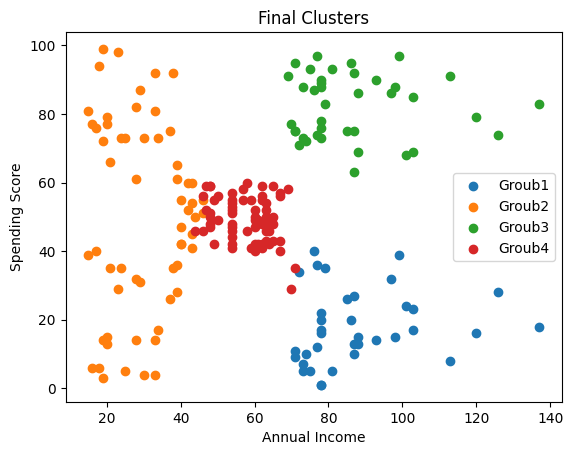

In [75]:
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],label="Groub1")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],label="Groub2")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],label="Groub3")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],label="Groub4")
plt.title("Final Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

### Distribution of Spending Scores Across KMeans Clusters

<Axes: xlabel='K_Means', ylabel='Spending Score (1-100)'>

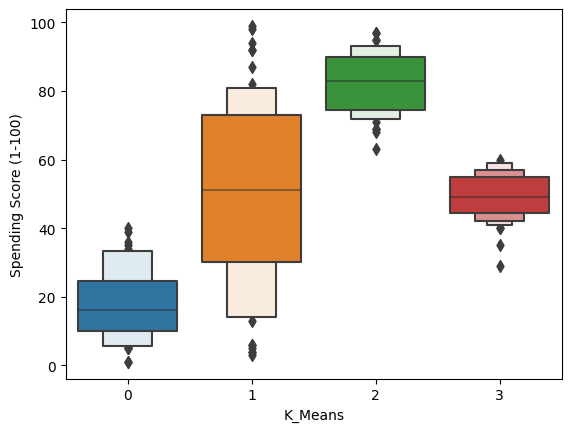

In [84]:
sns.boxenplot(x=df['K_Means'], y=df['Spending Score (1-100)'])
